This notebook will visualize the abstract syntax tree created by the interpreter

In [1]:
import graphviz
import lexer, parser

In [2]:
# Create AST
script = "| ?x <- | 5 !ADD | ?y !ADD 10 > > >"
dictionary = {}
tokens = lexer.tokenize(script)
tokens = list(tokens)
program = parser.parse_program(tokens, dictionary)

In [3]:
# Nodes and edges of the AST will be stored in lists
nodes = []
edges = []

attributes = ['left', 'operator', 'right', 'value', 'name']

# A global variable will be used to keep track of nodes (to distinguish between them)
i = 0

def add_node_and_connect(node, x, source, relationship):
    if node == None:
        node = ""
    nodes.append((str(x), {'label': str(node)}))
    if source != None:
        edges.append(((str(x), str(source)), {'label': str(relationship)}))


def process_node(node, parent):
    global i
    for attr in attributes:
        if attr in dir(node):
            i += 1
            add_node_and_connect(getattr(node, attr), i, parent, attr)
            if isinstance(getattr(node, attr), parser.Expression) or isinstance(getattr(node, attr), parser.Assignment):
                process_node(getattr(node, attr), i)

            
add_node_and_connect(program.statements[0], i, None, None)
process_node(program.statements[0], 0)

    

In [4]:
# Create graph
graph = graphviz.Graph(format='svg')
graph.graph_attr.update({'rankdir': 'BT', 'viewPort': '100'})

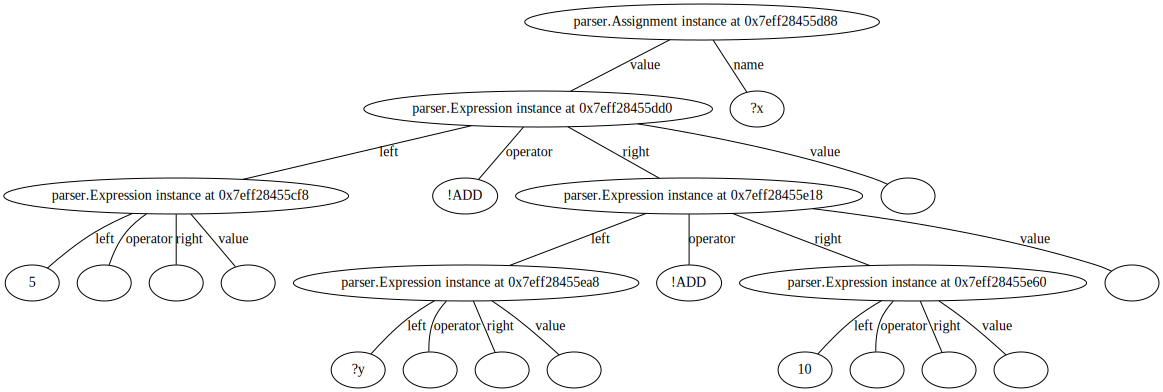

In [5]:
# Add nodes and edges to the graph
def add_nodes(graph, nodes):
    for n in nodes:
        graph.node(n[0], **n[1])
    return graph

def add_edges(graph, edges):
    for e in edges:
        graph.edge(*e[0], **e[1])
    return graph

add_nodes(graph, nodes)
add_edges(graph, edges)

In [8]:
# save graph
graph.render('AST-graph') 

'AST-graph.svg'